autor: Mariano Zibecchi  
mzibecchi@gmail.com  
  
# Laboratorio Introducción al Deep Learning:  
## ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

### Armado de un esquema de aprendizaje automático:

En el presente laboratorio se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación. El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

__HINT__: A modo de ayuda, se agrega la notebook `Intro_Deep_Learning_EXAMPLES.ipynb` para que puedan ver distintos modelos y como usarlos en problemas de clasificación binaria y multiclase.

---
## Librerías y Semilla

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from ml.visualization import plot_confusion_matrix, classifier_boundary
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import axes3d

from sklearn import tree

#Semilla
np.random.seed(0)

__TODO__: Curar los datos.

##### Convertimos fechas

In [2]:
dataset = pd.read_csv("../Datos/data.csv", comment="#",  
                      parse_dates=["date_account_created","timestamp_first_active", "date_first_booking"],
                  index_col=["id"]) 
print('\nLongitud del dataset: '+str(len(dataset))+'\n')


Longitud del dataset: 213451



In [3]:
dataset.describe(include='all')

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,1634,213451,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,2014-05-13 00:00:00,2013-07-01 05:26:34,2014-05-22 00:00:00,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,674,1,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
first,2010-01-01 00:00:00,2009-03-19 04:32:55,2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-06-30 00:00:00,2014-06-30 23:58:24,2015-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(213451, 15)

In [5]:
dataset.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


#### Algunas validaciones de reglas de negocio...

In [6]:
missing_values_count = dataset.isnull().sum()

In [7]:
len(dataset[ dataset.country_destination=="NDF"]) == missing_values_count.date_first_booking

True

date_first_booking en null significa que no se elegió ningún destino, es correcto que la cantidad de NDF sea igual a date_first_booking en null

In [8]:
percentage_null = (missing_values_count / len(dataset))*100
percentage_null

date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

##### Tratamiento de fechas - conversion a epoch

In [9]:
def date_convert_to_epoch( date ):
    # date is a pandas datetime
    # https://stackoverflow.com/questions/35630098/convert-a-column-of-datetimes-to-epoch-in-python
    
    return date.astype('int64')//1e9


In [10]:
dataset['date_account_created'] = date_convert_to_epoch( dataset.date_account_created )
dataset['timestamp_first_active'] = date_convert_to_epoch( dataset.timestamp_first_active )
dataset['date_first_booking'] = date_convert_to_epoch( dataset.date_first_booking )

In [11]:
print(dataset.date_account_created.head())
print(dataset.timestamp_first_active.head())
print(dataset.date_first_booking.head())

id
gxn3p5htnn    1277683200
820tgsjxq7    1306281600
4ft3gnwmtx    1285632000
bjjt8pjhuk    1323043200
87mebub9p4    1284422400
Name: date_account_created, dtype: int64
id
gxn3p5htnn    1237437175
820tgsjxq7    1243100889
4ft3gnwmtx    1244589167
bjjt8pjhuk    1256968889
87mebub9p4    1260252665
Name: timestamp_first_active, dtype: int64
id
gxn3p5htnn   -9223372037
820tgsjxq7   -9223372037
4ft3gnwmtx    1280707200
bjjt8pjhuk    1347062400
87mebub9p4    1266451200
Name: date_first_booking, dtype: int64


In [12]:
# chequeamos duplicados
dataset[ dataset.duplicated() ]

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,


In [13]:
percentage_null = (missing_values_count / len(dataset))*100
percentage_null

date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

No hacemos nada con __date_first_booking__ porque que este en blanco significa que no seleccionó ningun destino todavia...

### Tratamiento de Age

Tratamos los blancos en la edad. Reemplazamos por la media

In [14]:
dataset.age.fillna( dataset.age.mean(), inplace=True)
dataset.age.head()

id
gxn3p5htnn    49.668335
820tgsjxq7    38.000000
4ft3gnwmtx    56.000000
bjjt8pjhuk    42.000000
87mebub9p4    41.000000
Name: age, dtype: float64

__TODO__: Determinar el set de features que vas a usar.

No vamos a usar el feature __first_affiliate_tracked__ y eliminamos el __id__

In [15]:
dataset = dataset.drop(columns=['first_affiliate_tracked'])

__TODO__: ¿Es una dataset balanceado? ¿Cuál es su implicancia y que podemos hacer con ello?

In [16]:
print('Frecuencias del Target')
display(dataset.country_destination.value_counts())

# guardamos la lista de paises, antes de pisarla
countries = dataset.country_destination.unique()
print(countries)

Frecuencias del Target


NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


Es un dataset no balanceado: NDF, US, other...
Para ver tecnicas para manejar este tipo de datasets, ver:
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
(gentileza Santiago Alasia)

### Convertimos datos categoricos

In [17]:
print(dataset.gender.unique())
print(dataset.signup_method.unique())
#print(dataset.signup_flow.unique())
print(dataset.language.unique())
print(dataset.affiliate_channel.unique())
print(dataset.affiliate_provider.unique())
print(dataset.signup_app.unique())
print(dataset.first_device_type.unique())
print(dataset.first_browser.unique())
print(dataset.country_destination.unique())

['-unknown-' 'MALE' 'FEMALE' 'OTHER']
['facebook' 'basic' 'google']
['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browse

In [18]:
from sklearn import preprocessing

In [19]:
def categories_convert( dataset, column ):
    # given a dataset and a column (categorical)
    # converts categories in codes, replacing all values in that column
    
    # Create a label (category) encoder object
    le = preprocessing.LabelEncoder()
    # Fit the encoder to the pandas column
    le.fit(dataset[column])
    
    # View encoder mapping
    # print(dict(zip(le.classes_,le.transform(le.classes_))))
    dataset[column] = le.transform(dataset[column])

In [20]:
categories_convert(dataset, "gender")
categories_convert(dataset, "first_device_type")
categories_convert(dataset, "signup_method")
categories_convert(dataset, "language")
categories_convert(dataset, "affiliate_channel")
categories_convert(dataset, "affiliate_provider")
categories_convert(dataset, "signup_app")
categories_convert(dataset, "first_device_type")
categories_convert(dataset, "first_browser")
categories_convert(dataset, "country_destination")

In [21]:
print(dataset.signup_method.unique())
#print(dataset.signup_flow.unique())
print(dataset.language.unique())
print(dataset.affiliate_channel.unique())
print(dataset.affiliate_provider.unique())
print(dataset.signup_app.unique())
print(dataset.first_device_type.unique())
print(dataset.first_browser.unique())
print(dataset.country_destination.unique())

[1 0 2]
[ 5  8  3  6 13 19 24 15 14 20 18  4 21 16 10  2 11  7 17 23 22  1  9  0
 12]
[2 7 3 6 1 5 4 0]
[ 4  8 12  2  6 14  1 10  7  5 16 13  9 15 11  0 17  3]
[2 1 3 0]
[3 6 8 4 2 1 7 0 5]
[ 8 21 17 41  0 29  9 40 10  2  1 39 28 33 48 22  3 43  7  4  6 42 25 46
 24 34 44 27 26 14 13 51 19 15 30 32 37 31 11 12 18 38  5 35 50 49 45 16
 47 20 36 23]
[ 7 10 11  4  1  5  3  6  9  8  2  0]


---
## Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o `training`) y evaluación (o `test`). El primero será utilizado para la creación/selección del modelo de clasificación. El segundo se utilizará sólo al final (una vez elegidos los mejores hiperparámetros) para ver cuál es el resultado final del modelo sobre un conjunto de datos independiente.

In [22]:
cant_cols = dataset.shape[1]
cant_cols

14

In [23]:
# train_test_split recibe como parametros los datos de entrenamiento y el target
# separar el dataset en esos dos conjuntos:

from sklearn import model_selection

dataset_target = dataset.loc[:,'country_destination']
dataset_train = dataset.drop(columns=['country_destination'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(dataset_train, dataset_target, test_size=0.33, random_state=3)

In [42]:
x_train.head(), x_test.head()

(            date_account_created  timestamp_first_active  date_first_booking  \
 id                                                                             
 uzuneo4yz7            1332547200              1332627721         -9223372037   
 cluhjarag2            1336435200              1336443735          1337040000   
 yxmwrq5gkk            1400803200              1400864118          1400803200   
 zh6horkx4p            1403136000              1403155657          1404000000   
 xeu373dd79            1351728000              1351748970         -9223372037   
 
             gender        age  signup_method  signup_flow  language  \
 id                                                                    
 uzuneo4yz7       0  49.668335              0            0         5   
 cluhjarag2       2  48.000000              0            0         5   
 yxmwrq5gkk       1  31.000000              0            0         8   
 zh6horkx4p       1  24.000000              0            0         5   

In [52]:
 y_train.head(), len(y_test)

(id
 uzuneo4yz7     7
 cluhjarag2    10
 yxmwrq5gkk    10
 zh6horkx4p     3
 xeu373dd79     7
 Name: country_destination, dtype: int32, 70439)

In [51]:
y_test.head(), len(y_test)

(id
 hie6wfd0fx    7
 lcle1867k1    7
 ni2pstga7k    7
 agfw6zzgh5    7
 mu5y5rqynk    7
 Name: country_destination, dtype: int32, 70439)

In [58]:
df=y_test.to_frame()
len(df[df.country_destination == 7])

41097

In [25]:
print("----------------------------------------")
print('Frecuencias del Target')
display(dataset.country_destination.value_counts())

----------------------------------------
Frecuencias del Target


7     124543
10     62376
11     10094
4       5023
6       2835
5       2324
3       2249
1       1428
2       1061
8        762
0        539
9        217
Name: country_destination, dtype: int64

### Funciones Auxiliares

In [26]:
def classification_print_results( y_true, y_pred ):
    
    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    
    print(classification_report(y_true, y_pred), end="\n\n")
    print()
    
    print(confusion_matrix(y_true, y_pred))
    print()


In [27]:
import itertools
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
            title = "Normalized confusion matrix"
        else:
            title = "Confusion matrix"
        
    
    cnf_matrix = confusion_matrix(y_true, y_pred)

    #classes = classes[ unique_labels(y_true, y_pred)]
    classes = unique_labels(y_true, y_pred)
    
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        print(cnf_matrix)

    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots( figsize=(10,10) )
    
    im = ax.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cnf_matrix.shape[1]),
           yticks=np.arange(cnf_matrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            ax.text(j, i, format(cnf_matrix[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cnf_matrix[i, j] > thresh else "black")
    fig.tight_layout()
    fig.show()
    return ax



#### Correlación de las features

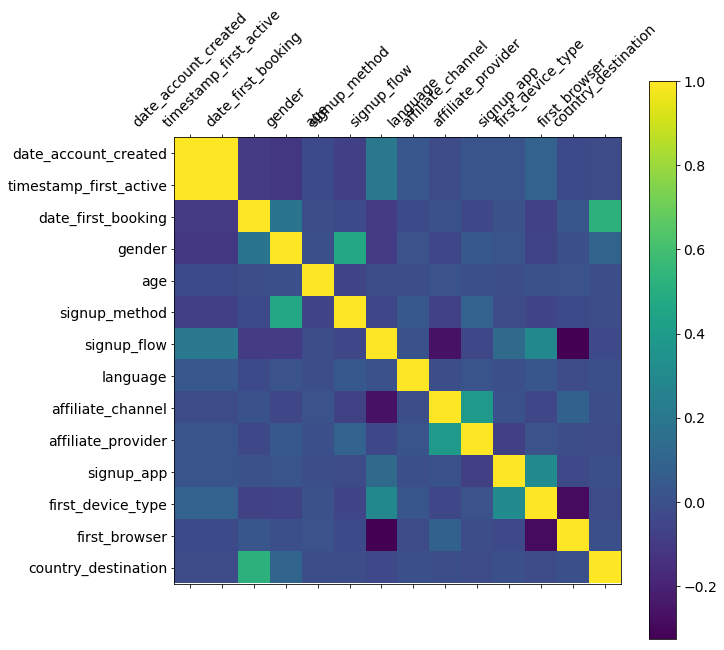

In [28]:
f = plt.figure(figsize=(10, 10))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

No se observan a primera vista correlaciones fuertes con __country_destination__  
Solo __age__ y __gender__ tienen alguna aparente correlación.

---
## Ejercicio 2: Elección de un modelo

Basándose en lo visto en el teórico escojan y justifiquen un modelo de aprendizaje automático. Recuerden que los pasos para elegir un modelo son:

1. Selección de hipótesis.
2. Selección de regularizador.
3. Selección de función de coste.

__TODO__: Justifica tus selecciones anteriores.

__HINT__: Deben tener en cuenta que __NO__ se trata de una `clasificación binaria`.

### Hacemos una prueba con Multinomial Logistic Regression

Seleccionamos Multinomial, ya que se trata de un problema multi clase.


In [47]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model_lg.fit (x_train, y_train)

y_true, y_pred = y_test, model_lg.predict(x_test)
    
print(classification_report(y_true, y_pred), end="\n\n")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.00      0.00      0.00       449
           2       0.00      0.00      0.00       356
           3       0.00      0.00      0.00       745
           4       0.00      0.00      0.00      1689
           5       0.00      0.00      0.00       776
           6       0.00      0.00      0.00       892
           7       1.00      1.00      1.00     41097
           8       0.00      0.00      0.00       254
           9       0.00      0.00      0.00        61
          10       0.70      1.00      0.83     20639
          11       0.00      0.00      0.00      3308

   micro avg       0.88      0.88      0.88     70439
   macro avg       0.14      0.17      0.15     70439
weighted avg       0.79      0.88      0.83     70439




__Refuerzo sobre las definiciones__  
*Precision: que tan buenas son cada una de tus predicciones*  
*Recall: que tan bueno sos, encontrando TODOS los positivos*  

__Precision – What percent of your predictions were correct?__
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
Precision = Accuracy of positive predictions.

TP – True Positives
FP – False Positives

Precision = TP/(TP + FP)

__Recall – What percent of the positive cases did you catch?__
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall = Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

__F1 score – What percent of positive predictions were correct?__
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

__Support - is the number of occurrences of each class in y_true.__

### Hacemos una prueba con Grid Search 


In [62]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(x_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(x_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    # mostrar matriz de confusion
    #plot_confusion_matrix(y_true, y_pred)

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.829 (+/-0.009) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.817 (+/-0.014) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.778 (+/-0.014) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.701 (+/-0.020) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.822 (+/-0.012) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.768 (+/-0.017) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.817 (+/-0.014) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.817 (+/-0.014) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

<Figure size 1120x320 with 0 Axes>

---
## Ejercicio 3: Selección de hiperparámetros

Utilizando búsqueda exhaustiva (`grid search`) y métrica del área bajo la curva de ROC (o *ROC-AUC*), hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

tree = DT(random_state=42)

samples_split = (100,600,1100,1600,2100,2600)
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 8),
              'min_samples_split': samples_split} #best 680

tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(x_train, y_train)

best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.8753321423696074
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2600,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2600,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


---
## Ejercicio 4: Métricas sobre el conjunto de evaluación

Una vez encontrados los mejores hiperparámetros para el modelo seleccionado en los apartados anteriores se evalúa el modelo final entrenado sobre el conjunto de datos de evaluación seleccionado en el __Ejercicio 1__. 

* Pueden utilizar las métricas que crean convenientes. 
* Es mejor utilizar más de una métrica. 
* Particularmente el __reporte de clasificación__ y la __matriz de confusión__ son buenos ejemplos de métricas.

In [64]:
# correr prediccion
y_true, y_pred = y_test, tree_clf.predict(x_test)

# mostrar metricas (precision, recall, etc)
classification_print_results(y_true, y_pred)

# mostrar matriz de confusion
#plot_confusion_matrix(y_true, y_pred)

print(set(zip(countries,dataset.country_destination.unique())))


Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.00      0.00      0.00       449
           2       0.00      0.00      0.00       356
           3       0.00      0.00      0.00       745
           4       0.00      0.00      0.00      1689
           5       0.00      0.00      0.00       776
           6       0.00      0.00      0.00       892
           7       1.00      1.00      1.00     41097
           8       0.00      0.00      0.00       254
           9       0.00      0.00      0.00        61
          10       0.70      1.00      0.83     20639
          11       0.00      0.00      0.00      3308

   micro avg       0.88      0.88      0.88     70439
   macro avg       0.14      0.17      0.15     70439
weighted avg       0.79      0.88      0.83     70439



[[    0     0     0     0     0     0     0   

*Links a como leer el classification_report*  
https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019  
https://muthu.co/understanding-the-classification-report-in-sklearn/

*Links sobre tratamiento de imbalanced datasets*  
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

---
## Ejercicio 5 (opcional): Curvas de ROC

Como ejercicio adicional (opcional), pueden redefinir el umbral de decisión óptimo del problema a partir de los resultados que muestren curvas de ROC como justificación. 

Pueden ver esto mediante la [graficación de las curvas de ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). En el link que se les brinda se muestra como hacer para graficar curvas de ROC para problemas multiclase. 

---
## ¿Conclusiones?